In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt


In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=83)


In [5]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))


506
0.7984189723320159
0.2015810276679842


In [6]:
lr = LinearRegression().fit(X_train, y_train)

In [7]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

(-10.0, 60.0)

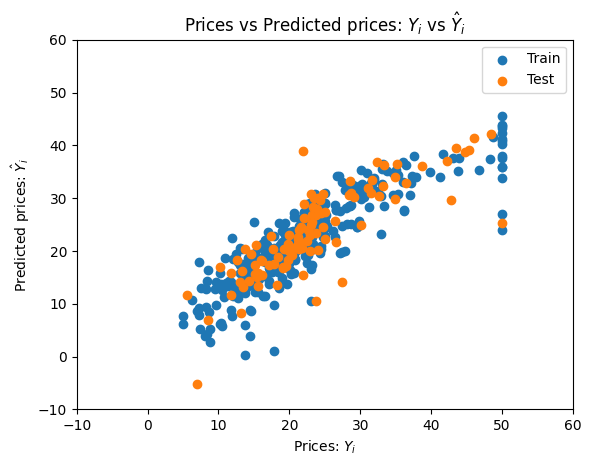

In [8]:
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_pred, label='Test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.xlim([-10, 60])
plt.ylim([-10, 60])


Dla idealnie dopasowanych danych punkty powinny być na jednej linii po przekątnej wykresu

In [9]:
mean_squared_error(y_test, y_pred)

27.06190953437723

In [10]:
lr.score(X_train, y_train_pred)

1.0

In [11]:
mean_squared_error(y_train, y_train_pred)


20.768884667366102

In [12]:
lr.score(X_test, y_test)


0.6733441558085081

In [13]:
polynomial_features = PolynomialFeatures(degree=2)
X_train_ = polynomial_features.fit_transform(X_train)
X_test_ = polynomial_features.fit_transform(X_test)


In [14]:
lr_ = LinearRegression().fit(X_train_, y_train)
y_train_pred_ = lr_.predict(X_train_)
y_pred_ = lr_.predict(X_test_)


(-5.0, 60.0)

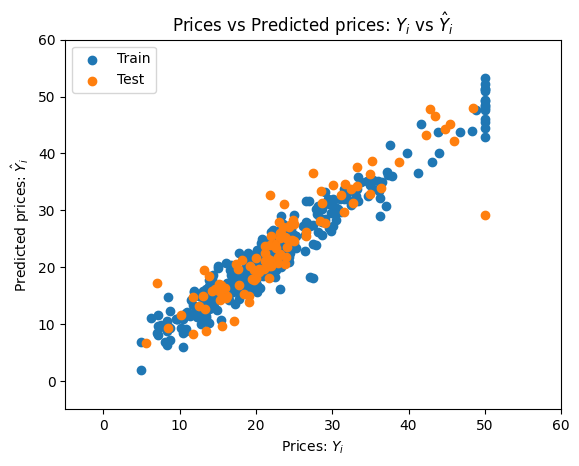

In [15]:
plt.scatter(y_train, y_train_pred_, label='Train')
plt.scatter(y_test, y_pred_, label='Test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.xlim([-5, 60])
plt.ylim([-5, 60])


W przypadku użycia nieliniowości wykres stał się bardziej "liniowy"

In [16]:
mean_squared_error(y_test, y_pred_)


13.9170162608501

In [17]:
lr_.score(X_test_, y_test)

0.8320120503861803

In [18]:
mean_squared_error(y_train, y_train_pred_)


5.168708303523527

In [19]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [20]:
ridge.score(X_train, y_train)

0.7541225078768763

In [33]:
def fun1():
    mse_train = []
    mse_test = []
    score_train = []
    score_test = []
    for alpha in np.logspace(-5, 5, 100):
        clf = Ridge(alpha=alpha).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, clf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, clf.predict(X_test)))
        score_train.append(clf.score(X_train, y_train))
        score_test.append(clf.score(X_test, y_test))
    return mse_train, mse_test, score_train, score_test


In [34]:
def fun2():
    mse_train = []
    mse_test = []
    score_train = []
    score_test = []
    for alpha in np.logspace(-5, 5, 100):
        clf = Lasso(alpha=alpha).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, clf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, clf.predict(X_test)))
        score_train.append(clf.score(X_train, y_train))
        score_test.append(clf.score(X_test, y_test))
    return mse_train, mse_test, score_train, score_test


In [35]:

mseRidge_train, mseRidge_test, scoreRidge_train, scoreRidge_test = fun1()
mseLasso_train, mseLasso_test, scoreLasso_train, scoreLasso_test = fun2()


Text(0.5, 1.0, 'Ridge MSE for alpha')

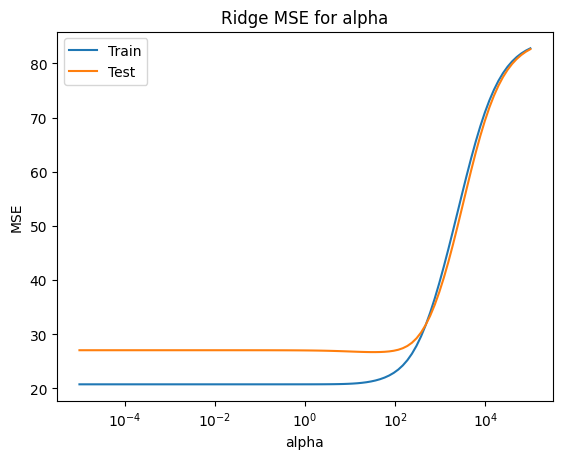

In [36]:
plt.semilogx(np.logspace(-5, 5, 100), mseRidge_train, label='Train')
plt.semilogx(np.logspace(-5, 5, 100), mseRidge_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge MSE for alpha')

Text(0.5, 1.0, 'Ridge score for alpha')

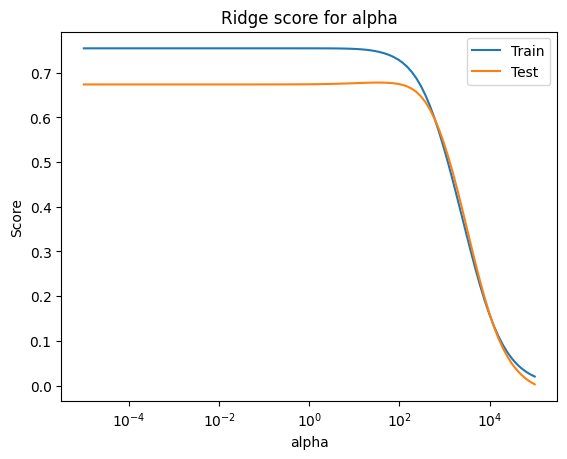

In [37]:
plt.semilogx(np.logspace(-5, 5, 100), scoreRidge_train, label='Train')
plt.semilogx(np.logspace(-5, 5, 100), scoreRidge_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Ridge score for alpha')

Text(0.5, 1.0, 'Lasso MSE for alpha')

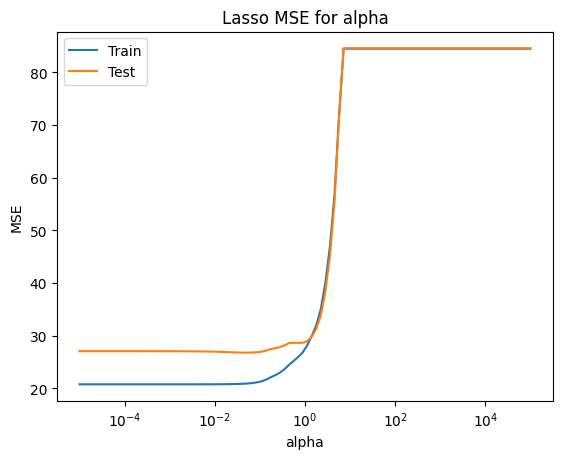

In [38]:
plt.semilogx(np.logspace(-5, 5, 100), mseLasso_train, label='Train')
plt.semilogx(np.logspace(-5, 5, 100), mseLasso_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso MSE for alpha')


Text(0.5, 1.0, 'Lasso score for alpha')

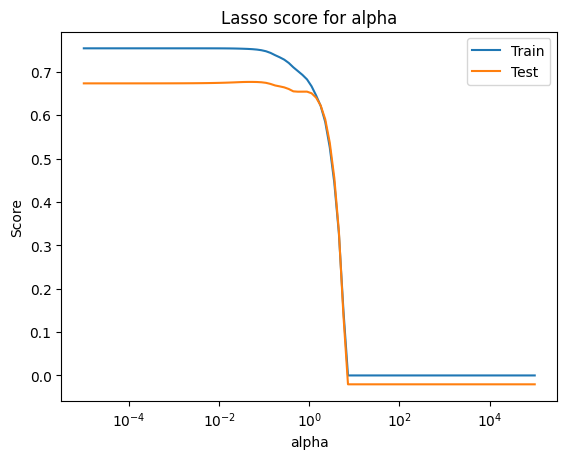

In [39]:
plt.semilogx(np.logspace(-5, 5, 100), scoreLasso_train, label='Train')
plt.semilogx(np.logspace(-5, 5, 100), scoreLasso_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Lasso score for alpha')

# Regularyzacja dla Regresji Logistycznej A

In [42]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

In [47]:
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
df.isnull().values.any()

False

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=83)

In [74]:
from sklearn.linear_model import LogisticRegression

def fun3():
    acc = []
    for alpha in np.logspace(-5, 5, 100):
        clf = LogisticRegression(random_state=83, max_iter=1000, solver='liblinear', penalty='l2', C=alpha).fit(X_train, y_train)
        acc.append(clf.score(X_test, y_test))
    return acc

In [75]:
lrAcc = fun3()

Text(0.5, 1.0, 'Lasso score for alpha')

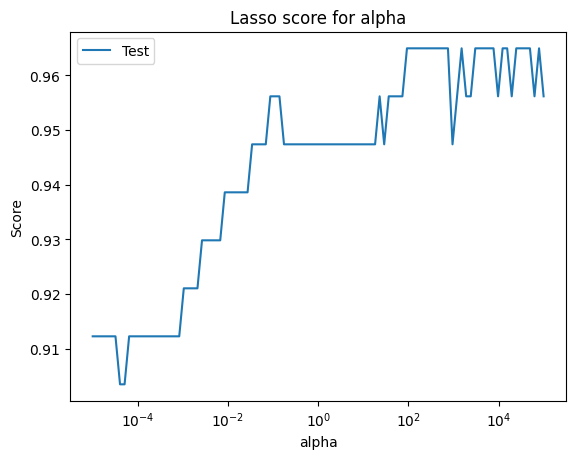

In [71]:
plt.semilogx(np.logspace(-5, 5, 100), lrAcc, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Score')
plt.title('Lasso score for alpha')